# Example 2: Coupled Transmon Qubits

In [1]:
%load_ext autoreload
%autoreload 2
import time

In [ ]:
import json
import design as d
import names as n

with open("design_variables.json") as in_file:
    initial_design_variables = json.load(in_file)

from qdesignoptimizer.utils.chip_generation import create_chip_base, ChipType

In [3]:
# for this example to store the data in the right place
import os

os.makedirs(os.path.dirname("out/"), exist_ok=True)

## Design assembly

In [4]:
CHIP_NAME = "multi_transmon_chip"
OPEN_GUI = True
# chip_type = ChipType(size_x="10mm", size_y="10mm", size_z="-300um")
# design, gui = create_chip_base(
#     chip_name=CHIP_NAME, chip_type=chip_type, open_gui=OPEN_GUI
# )

# n.add_design_variables_to_design(design, initial_design_variables)

## MiniStudies

In [5]:
import mini_studies as ms
import optimization_targets as ot
import parameter_targets as pt
import plot_settings as ps

from qdesignoptimizer.design_analysis import DesignAnalysis, DesignAnalysisState
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qdesignoptimizer.design_analysis_types import MeshingMap

### Single resonator-qubit system
Useful when first tuning up subsystems

In [6]:
def CoupledLineTee_mesh_names(comp_names):
    all_names_to_mesh = [f"prime_cpw_{comp_names}", f"second_cpw_{comp_names}"]
    return all_names_to_mesh

In [7]:
MINI_STUDY_GROUP = n.NBR_1
MINI_STUDY = ms.get_mini_study_qb_res(group=MINI_STUDY_GROUP)
# RENDER_QISKIT_METAL = lambda design: render_qiskit_metal_design(design, gui)

opt_targets = ot.get_opt_targets_2qubits_resonator_coupler(
    groups=[MINI_STUDY_GROUP],
    opt_target_qubit_freq=True,
    opt_target_qubit_anharm=True,
    opt_target_resonator_freq=True,
    opt_target_resonator_kappa=True,
    opt_target_resonator_qubit_chi=True,
)

In [8]:
from qdesignoptimizer.utils.plotting import load_data_by_date, plot_optimization_results

In [9]:
files = load_data_by_date('out',CHIP_NAME,"multi_transmon_chip_20250312-115706","multi_transmon_chip_20250312-115706")
plot_optimization_results(files,opt_target_list=opt_targets,plot_design_variables="chronological")

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

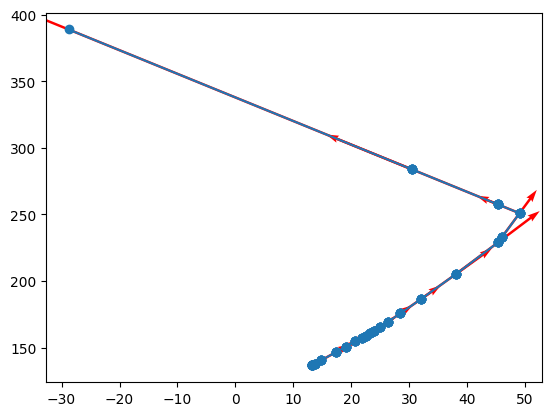

In [83]:
import numpy as np
xy_list = np.load(r'out/temp_list.npy')
x_list,y_list = (xy_list)

plt.plot(x_list,y_list,'o-')

U = np.diff(x_list)  # Differences in x
V = np.diff(y_list)  # Differences in y
plt.quiver(x_list[:-1], y_list[:-1], U, V, scale_units='xy', angles='xy', scale=0.5, color='r')
plt.show()

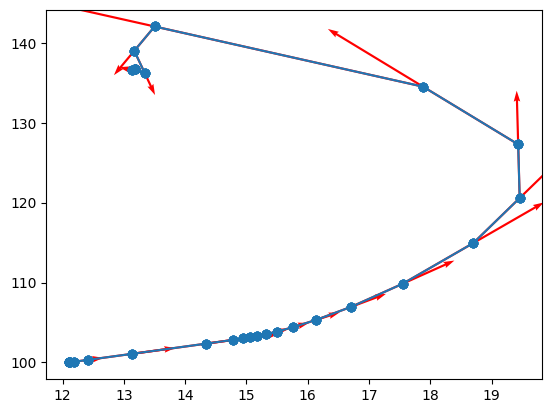

In [82]:
import numpy as np
xy_list = np.load(r'out/temp_list.npy')
x_list,y_list = (xy_list)

plt.plot(x_list,y_list,'o-')

U = np.diff(x_list)  # Differences in x
V = np.diff(y_list)  # Differences in y
plt.quiver(x_list[:-1], y_list[:-1], U, V, scale_units='xy', angles='xy', scale=0.5, color='r')
plt.show()

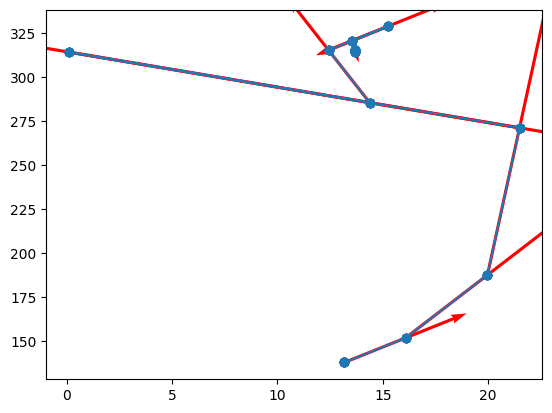

In [81]:
import numpy as np
xy_list = np.load(r'out/temp_list.npy')
x_list,y_list = (xy_list)

plt.plot(x_list,y_list,'o-')

U = np.diff(x_list)  # Differences in x
V = np.diff(y_list)  # Differences in y
plt.quiver(x_list[:-1], y_list[:-1], U, V, scale_units='xy', angles='xy', scale=0.5, color='r')
plt.show()

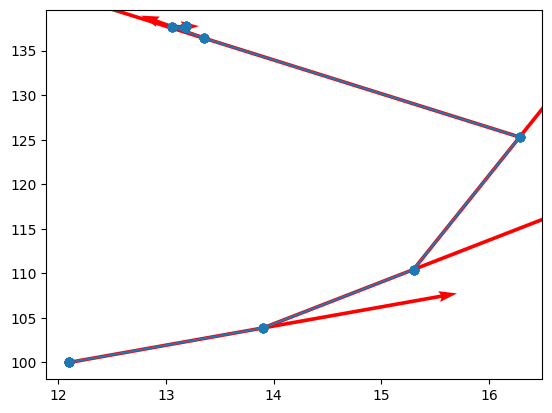

In [80]:
import numpy as np
xy_list = np.load(r'out/temp_list.npy')
x_list,y_list = (xy_list)

plt.plot(x_list,y_list,'o-')

U = np.diff(x_list)  # Differences in x
V = np.diff(y_list)  # Differences in y
plt.quiver(x_list[:-1], y_list[:-1], U, V, scale_units='xy', angles='xy', scale=0.5, color='r')
plt.show()

In [33]:
a = [[1,2],[3,2]]
np.save("test.npy",a)
b = np.load('test.npy')

In [37]:

b.tolist()[0]

[1, 2]